# Applying Chi Square Test to NC Congressional Districts 


## Helper Functions

In [193]:
def get_graph(bin_width):
    # make bins of with the specified width
    bins = [.5 + bin_width*idx for idx in range(int(np.ceil(.5/ bin_width)))]
    bins.append(1)
    
    # group vote shares into bins
    observed_frequency, bins = np.histogram(observed_vote_shares, bins, density=True)
    expected_frequency, _ = np.histogram(expected_vote_shares, bins, density=True)
    
    # generate the graph
    fig, ax = plt.subplots()
    n, bins, _ = ax.hist(bins[:-1], bins, weights=(observed_frequency*bin_width), label ='observed_frequency', rwidth=0.9)
    ax.plot([x - (bin_width/2) for x in bins][1:], expected_frequency*bin_width, 'r.-', label='expected_frequency')
    ax.legend()
    fig.set_size_inches(18.5, 10.5)
    return observed_frequency, expected_frequency


## Load Data

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/congressional_election_results_post1948.csv')
df['winner_vote_share'] = df['D Voteshare'].apply(lambda x: x if x > 0.5 else 1- x)

Observed data: Winner's Vote Share in NC Congressional Districts after 2010 redraw


Expected data: Winner's Vote Share in NC Congressional Districts before 2010 redraw

In [195]:
observed_mask = (df.Year.isin(['2012','2014','2016', '2018'])) & (df.State == 'NC')
expected_mask = (df.Year.isin(['2002','2004','2006', '2008', '2010'])) & (df.State == 'NC')
observed_vote_shares = df[observed_mask]['winner_vote_share']
expected_vote_shares = df[expected_mask]['winner_vote_share']

## 2.35% bins

#### Bin size rational: Standard Deviation of Observed

bins width:  0.023503461250500034


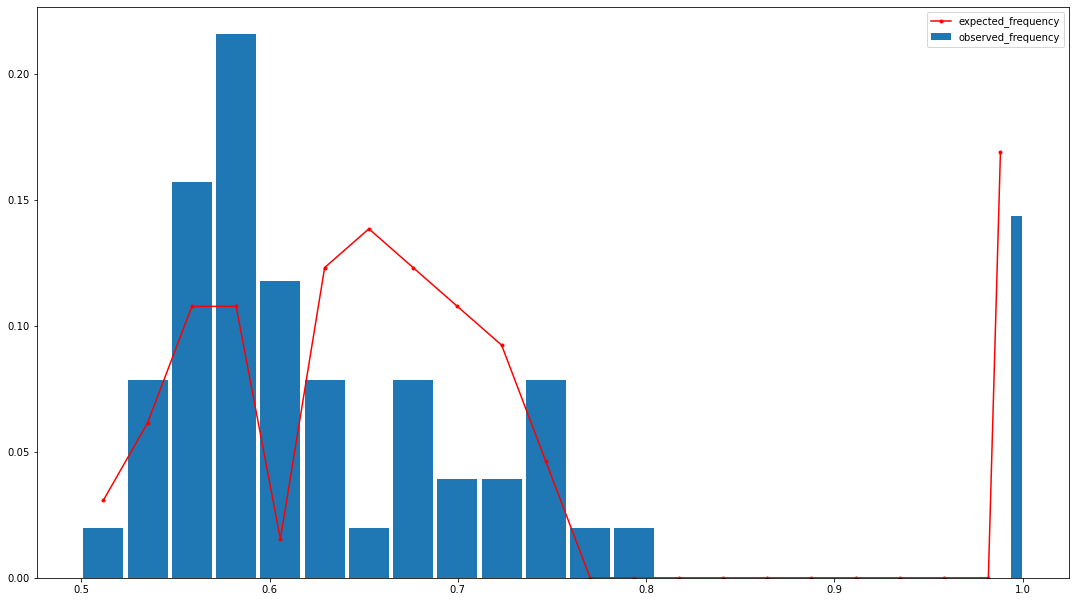

In [200]:
std_winner_vote_share = np.std(df[observed_mask].groupby('Year')['winner_vote_share'].mean())
bin_width = std_winner_vote_share
print('bins width: ', bin_width)
observed_frequency, expected_frequency = get_graph(bin_width)

#### Tests

Chi-square test considering most contiguous bins where Observed and Expected are non-zero.

In [198]:
stats.chisquare(observed_frequency[0:11], expected_frequency[0:11])

Power_divergenceResult(statistic=44.68451228343471, pvalue=2.4790253105655745e-06)

Chi-square test considering just the first 4 bins

In [199]:
stats.chisquare(observed_frequency[0:4], expected_frequency[0:4])

Power_divergenceResult(statistic=5.93243886758752, pvalue=0.11494388779134035)

## 4% bins

#### Bin size rational: Standard Deviation of Statewide D Voteshare from 2002-2018

bins width:  0.04015513189835897


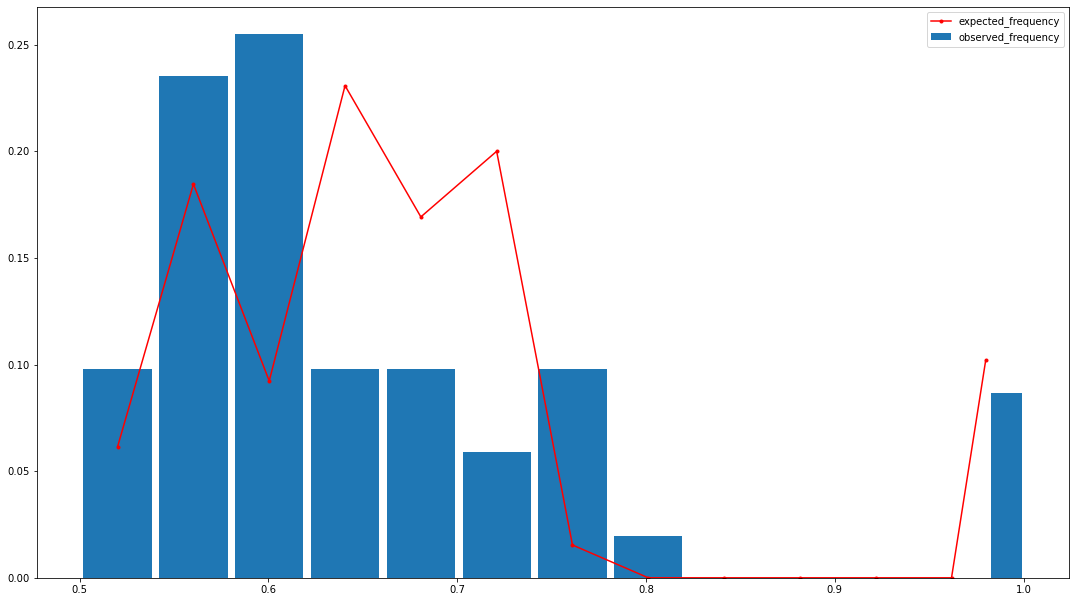

In [201]:
std_winner_vote_share = np.std(df[observed_mask | expected_mask].groupby('Year')['D Voteshare'].mean())
bin_width = std_winner_vote_share
print('bins width: ', bin_width)
observed_frequency, expected_frequency = get_graph(bin_width)

#### Tests

Chi-square test considering most contiguous bins where Observed and Expected are non-zero.

In [150]:
stats.chisquare(observed_frequency[0:7], expected_frequency[0:7])

Power_divergenceResult(statistic=24.20541089030487, pvalue=0.00047871395931947495)

Chi-square test considering just the first 4 bins

In [151]:
stats.chisquare(observed_frequency[0:4], expected_frequency[0:4])

Power_divergenceResult(statistic=9.919103789161225, pvalue=0.01926644862943319)